In [8]:
import os
import glob
from astropy.io import fits
from astropy.modeling import models, fitting
from matplotlib import pyplot
%matplotlib inline


# Check for drift in Visit 01

In [2]:
DATA_DIR = '../data/swiftuvot/reduced/00034040001/uvot/image'
FIG_DIR = '../figures/'

(1600, 3000)

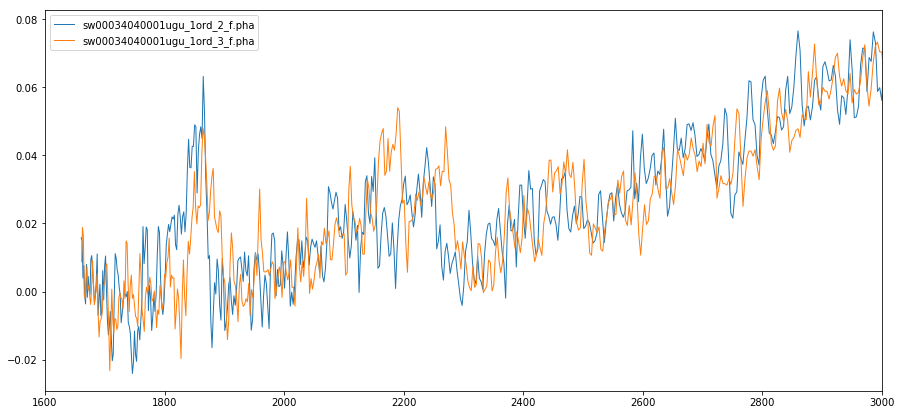

In [3]:
fig = pyplot.figure(figsize=[15, 7])
ax1 = fig.add_subplot(1,1,1)
flist = glob.glob(os.path.join(DATA_DIR, '*pha*'))
for ifile in flist[1:]:
    tbdata = fits.getdata(ifile, 2)
    pyplot.plot(tbdata['lambda'], tbdata['netrate'], label=os.path.basename(ifile))
ax1.legend(loc='best')
ax1.set_xlim(1600, 3000)

In [4]:
import numpy as np

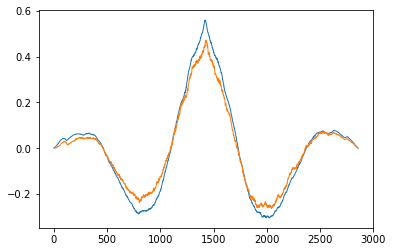

In [6]:
tbdata1 = fits.getdata(os.path.join(DATA_DIR, 'sw00034040001ugu_1ord_1_f.pha'), 2)
tbdata3 = fits.getdata(os.path.join(DATA_DIR, 'sw00034040001ugu_1ord_3_f.pha'), 2)
tbdata2 = fits.getdata(os.path.join(DATA_DIR, 'sw00034040001ugu_1ord_2_f.pha'), 2)
tbdata3 = fits.getdata(os.path.join(DATA_DIR, 'sw00034040001ugu_1ord_3_f.pha'), 2)
cc2 = np.correlate(tbdata2['netrate']-np.mean(tbdata2['netrate']), 
                   tbdata3['netrate']-np.mean(tbdata3['netrate']), mode='full')
cc1 = np.correlate(tbdata1['netrate']-np.mean(tbdata1['netrate']), 
                   tbdata3['netrate']-np.mean(tbdata3['netrate']), mode='full')
pyplot.plot(cc2)
pyplot.plot(cc1)

Parameter('mean', value=1410.71743609398) 1428


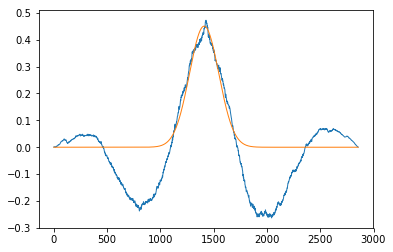

In [13]:
mod = models.Gaussian1D(mean=np.argmax(cc1))
fitter = fitting.LevMarLSQFitter()
offset = np.arange(len(cc1))

fit1 = fitter(mod, offset, cc1)

print(fit1.mean, np.argmax(cc1))
pyplot.plot(offset, cc1)
pyplot.plot(offset, fit1(offset))

Parameter('mean', value=1417.3336578599876)


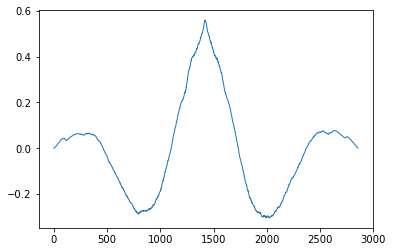

In [10]:
mod = models.Gaussian1D(mean=np.argmax(cc2))
fitter = fitting.LevMarLSQFitter()
offset = np.arange(len(cc2))

fit2 = fitter(mod, offset, cc2)

print(fit2.mean)
pyplot.plot(offset, cc2)
#pyplot.plot(offset, fit2(offset))

(0, 600)

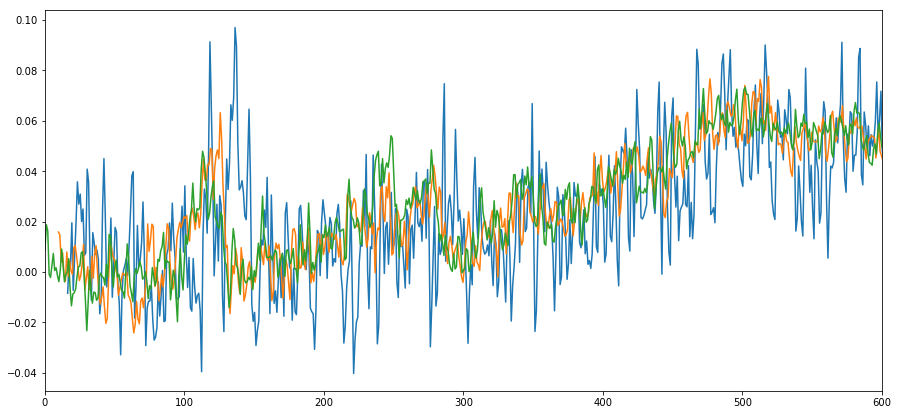

In [11]:
fig = pyplot.figure(figsize=[15, 7])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(np.arange(len(tbdata1))+len(tbdata3)-1-fit1.mean, tbdata1['netrate'], lw=1.5)
ax1.plot(np.arange(len(tbdata2))+len(tbdata3)-1-fit2.mean, tbdata2['netrate'], lw=1.5)
ax1.plot(np.arange(len(tbdata3)), tbdata3['netrate'], lw=1.5)
ax1.set_xlim(0, 600)

(0, 600)

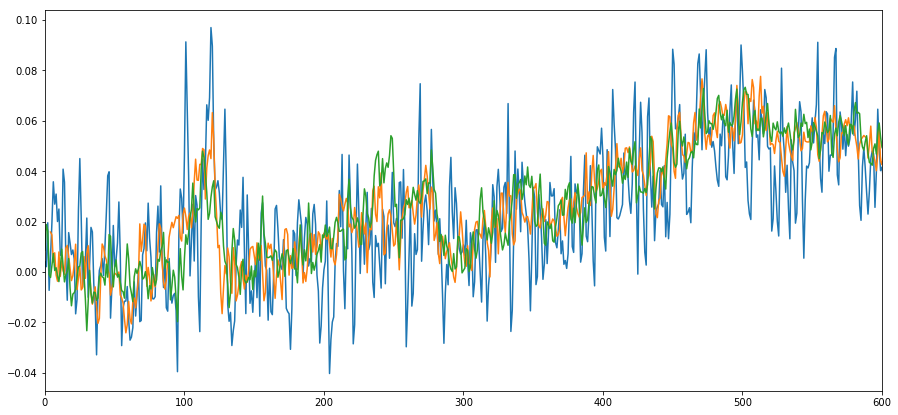

In [12]:
fig = pyplot.figure(figsize=[15, 7])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(np.arange(len(tbdata1))+len(tbdata3)-1-np.argmax(cc1), tbdata1['netrate'], lw=1.5)
ax1.plot(np.arange(len(tbdata2))+len(tbdata3)-1-np.argmax(cc2), tbdata2['netrate'], lw=1.5)
ax1.plot(np.arange(len(tbdata3)), tbdata3['netrate'], lw=1.5)
ax1.set_xlim(0, 600)

6

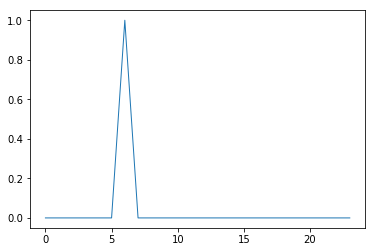

In [104]:
x = np.zeros(10)
y = np.zeros(15)
x[2] = 1
y[10] = 1
pix = np.arange(len(x))
pixy = np.arange(len(y))
pixx = pix+pixy[14]
cc = np.correlate(x, y, mode='full')
pyplot.plot(cc)

np.argmax(cc)
#len(cc)

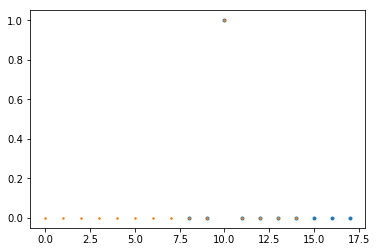

In [114]:
pyplot.plot(pix+len(y)-1-np.argmax(cc), x, 'o')
pyplot.plot(pixy, y, '.')

15

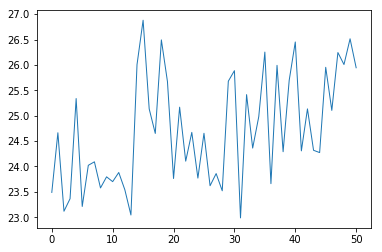

In [153]:
x = np.random.random(100)
y = np.random.random(150)
pix = np.arange(len(x))
pixy = np.arange(len(y))
pixx = pix+pixy[14]
cc = np.correlate(x, y, mode='full')
pyplot.plot(cc)

np.argmax(cc)

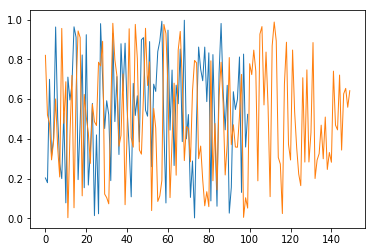

In [150]:
pyplot.plot(x)
pyplot.plot(y)